<a href="https://colab.research.google.com/github/amukund8/AML/blob/main/Mukund_Assign08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1: Plot the data with a scatterplot. How many species must be there in teh dataset?

In [ ]:
import pandas as pd


In [ ]:
data=pd.read_csv('clustering_synthetic_dataset.csv')

data.head()

,f1,f2
0,0.494261,1.451067
1,-1.428081,-0.837064
2,0.338559,1.038759
3,0.119001,-1.053976
4,1.122425,1.774937


In [ ]:
import numpy as np
x1=data.copy()

x1=np.array(x1)
print(x1.shape)

(750, 2)


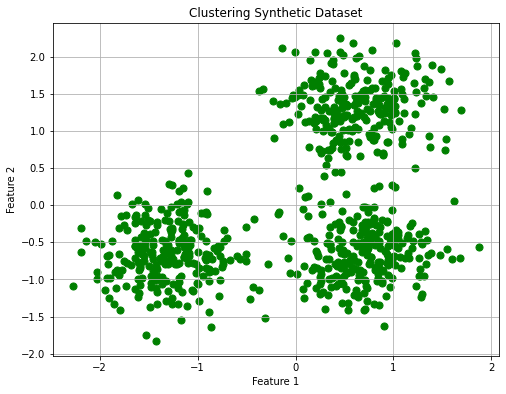

In [ ]:
import matplotlib.pyplot as plt

# Plotting the dataset
plt.figure(figsize=(8, 6))
plt.scatter(x1[:, 0], x1[:, 1], s=50,color='green')
plt.title("Clustering Synthetic Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


In this dataset there are 3 visible clusters that form species in this dataset based on the scatterplot shown above.

Question 2: Find the rough feature ragnes to classify these species correctly. It might be a good idea to do this step visually from some data points.

In [ ]:
# Find the borders of the features
featureA=x1[:, 0]
featureB=x1[:, 1]

print("Maximum value Feature A:", np.max(featureA))
print("Minimum value Feature A:", np.min(featureA))

print("Maximum value Feature B:", np.max(featureB))
print("Minimum value Feature B:", np.min(featureB))



Maximum value Feature A: 1.87043802694
Minimum value Feature A: -2.27447426719
Maximum value Feature B: 2.2457941917
Minimum value Feature B: -1.82380067733


Species 1, in the bottom left corner, has rough feature ranges for feature A from -2.27 to -0.3.

Species 1, in the bottom left corner, has rough feature ranges for feature B from -1.82 to 0.5

Species 2, in the bottom right corner, has rough feature ranges for feature A from -0.3 to 1.87.

Species 2, in the bottom right corner, has rough feature ranges for feature B from -1.6 to 0.3

Species 3, in the top, has rough feature ranges for feature A from -0.3 to 1.5.

Species 3, in the bottom left corner, has rough feature ranges for feature B from 0.5 to 2.245







Question 3: Use K-means clustering to find anomalies. Find cluster data points that are far from the centroids

In [ ]:
# Kmeans Clustering

from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=3,random_state=55)
kmeans.fit(x1)

centroids=kmeans.cluster_centers_
print(centroids)
labels=kmeans.labels_
print(labels)

# Distance from label centroid for each point
distance=np.sqrt(((x1-centroids[labels])**2).sum(axis=1))


threshold=np.mean(distance)+2*np.std(distance)

print(threshold)





[[ 0.6954587  -0.64442334]
 [ 0.62260555  1.3172598 ]
 [-1.30266211 -0.65704205]]
[1 2 1 0 1 2 2 0 1 1 2 2 2 0 2 1 2 2 2 0 0 0 0 0 2 2 0 1 1 0 1 2 2 1 2 1 0
 1 1 0 0 2 2 2 2 2 1 0 1 2 0 0 2 2 0 0 2 1 0 2 0 0 0 0 0 1 0 0 1 1 1 0 1 1
 0 2 1 2 1 0 2 2 1 1 1 1 2 0 2 0 0 1 2 1 2 1 2 2 1 1 0 2 0 1 0 0 0 0 1 1 1
 2 2 2 2 1 1 2 1 2 0 2 1 1 2 0 2 1 1 0 1 0 0 0 1 2 0 0 1 2 1 0 1 1 0 0 2 0
 2 1 0 2 2 0 0 0 1 2 1 2 1 2 1 0 0 2 2 0 0 2 1 2 0 0 0 2 2 0 0 1 2 0 1 1 0
 1 1 2 1 2 1 2 2 0 0 1 1 2 2 0 2 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 2 2 2 0 0 0
 0 2 0 0 1 1 0 1 1 1 2 1 2 2 2 0 2 2 1 2 0 0 2 0 0 2 1 1 2 2 2 1 2 1 0 1 0
 0 0 0 0 2 2 1 1 2 2 1 1 0 2 0 0 2 2 0 2 0 1 0 0 1 2 0 0 1 0 0 1 1 0 1 0 1
 0 2 1 1 1 2 0 2 0 0 1 0 0 1 1 0 2 2 2 2 2 1 2 2 2 2 1 1 2 2 2 1 0 1 2 0 0
 1 1 0 1 0 2 1 0 1 0 1 0 0 1 2 1 2 1 0 0 2 2 2 0 1 0 1 0 2 0 0 1 2 1 2 1 1
 1 1 0 1 0 1 2 1 2 0 2 2 2 1 2 2 1 0 2 1 0 0 2 2 0 0 0 2 0 2 0 1 0 2 0 2 1
 2 1 2 2 1 2 0 0 2 1 1 0 2 0 0 0 0 2 1 1 1 1 2 1 0 2 1 2 0 1 1 2 1 2 2 1 2
 1 0 0 0 2 2 0 1 2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
outliers=np.where(distance>threshold)[0]

filter1=np.delete(x1,outliers,axis=0)
labels2=np.delete(labels,outliers,axis=0)

print(outliers)

[ 16  39  76  85  95 108 110 135 146 149 158 165 265 273 282 337 343 443
 461 496 531 570 603 657 663 679 684 721 723]


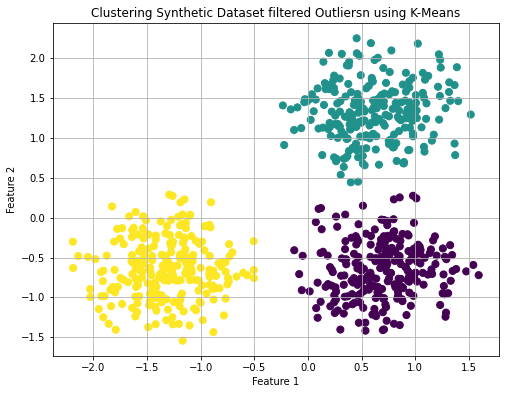

In [ ]:
# Plot Filtered dataset

# Plotting the dataset
plt.figure(figsize=(8, 6))
plt.scatter(filter1[:, 0], filter1[:, 1], s=50,c=labels2)
plt.title("Clustering Synthetic Dataset filtered Outliersn using K-Means")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

Question 4: Use DBSCAN to find anomalies. Look for anomalies with DBSCn in the full dataset. Alternative to KMeans

In [ ]:
# DBSCAN to find anomalies
from sklearn.cluster import DBSCAN


dbscan = DBSCAN(eps=1.0, min_samples=2)

dbscan.fit(x1)
labelsdb=dbscan.labels_

print(labelsdb)
print(np.unique(labelsdb))
unique_values, counts = np.unique(labelsdb, return_counts=True)
counts

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

array([750])

In [ ]:
# DBSCAN to find anomalies
from sklearn.cluster import DBSCAN


dbscan = DBSCAN(eps=0.5, min_samples=2)

dbscan.fit(x1)
labelsdb=dbscan.labels_

print(labelsdb)
print(np.unique(labelsdb))
unique_values, counts = np.unique(labelsdb, return_counts=True)
counts

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

array([750])

In [ ]:
# DBSCAN to find anomalies
from sklearn.cluster import DBSCAN


dbscan = DBSCAN(eps=0.4, min_samples=2)

dbscan.fit(x1)
labelsdb=dbscan.labels_

print(labelsdb)
print(np.unique(labelsdb))
unique_values, counts = np.unique(labelsdb, return_counts=True)
counts

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

array([  1, 749])

In [ ]:
# DBSCAN to find anomalies
from sklearn.cluster import DBSCAN


dbscan = DBSCAN(eps=0.25, min_samples=3)

dbscan.fit(x1)
labelsdb=dbscan.labels_

print(labelsdb)
print(np.unique(labelsdb))
unique_values, counts = np.unique(labelsdb, return_counts=True)
print()
counts

[ 0  1  0  1  0  1  1  1  0  0  1  1  1  1  1  0 -1  1  1  1  1  1  1  1
  1  1  1  0  0  1  0  1  1  0  1  0  1  0  0  1  1  1  1  1  1  1  0  1
  0  1  1  1  1  1  1  1  1  0  1  1  1  1  1  1  1  0  1  1  0  0  0  1
  0  0  1  1  0  1  0  1  1  1  0  0  0  0  1  1  1  1  1  0  1  0  1 -1
  1  1  0  0  1  1  1  0  1  1  1  1  0  0  0  1  1  1  1  0  0  1  0  1
  1  1  0  0  1  1  1  0  0  1  0  1  1  1  0 -1  1  1  0  1  0  1  0  0
  1  1  1  1  1  0  1  1  1  1  1  1  0  1  0  1  0  1  0  1  1  2  1  1
  1  1  0  1  1  1  1  1  1  1  1  0  1  1  0  0  1  0  0  1  0  1  0  1
  1  1  1  0  0  1  1  1  1  1  1  1  1  0  1  0  1  1  0  1  1  1  0  0
  1  1  1  1  1  1  1  1  1  1  0  0  1  0  0  0  1  0  1  1  1  1  1  1
  0  1  1  1  1  1  1  1  0  0  1  1  1  0  1  0  1  0  1  1  1  1  1  1
  1  0  0  1  1  0  0  1  1 -1  1  1  1  1  1  1  0  1  1  0  1  1  1  0
  1  1  0  0  1  0  1  0  1  1  0  0  0  1  1  1  1  1  0  1  1  0  0  1
  1  1  1  1  1  0  1  1  1  1  0  0  1  1  1  0  1

array([  7, 247, 493,   3])

In [ ]:
# DBSCAN to find anomalies
from sklearn.cluster import DBSCAN


dbscan = DBSCAN(eps=0.27, min_samples=10)

dbscan.fit(x1)
labelsdb2=dbscan.labels_

print(labelsdb2)
print(np.unique(labelsdb2))
unique_values, counts = np.unique(labelsdb2, return_counts=True)
counts

[ 0  1  0  2  0  1  1  2  0  0  1  1  1  2  1  0 -1  1  1  2  2  2  2  2
  1  1  2  0  0  2  0  1  1  0  1  0  2  0  0 -1  2  1  1  1  1  1  0  2
  0  1  2  2  1  1  2  2  1  0  2  1  2  2  2  2  2  0  2  2  0  0  0  2
  0  0  2  1 -1  1  0  2  1  1  0  0  0  0  1  2  1  2  2  0  1  0  1 -1
  1  1  0  0  2  1  2  0  2  2  2  2 -1  0 -1  1  1  1  1  0  0  1  0  1
  2  1  0  0  1  2  1  0  0  2  0  2  2  2  0 -1  2  2  0  1  0  2  0  0
  2  2 -1  2  1 -1  2  1  1  2  2  2 -1  1  0  1  0  1  0  2  2 -1  1  2
  2  1  0  1  2  2  2  1  1  2  2  0  1  2  0  0  2  0  0  1  0  1  0  1
  1  2  2  0  0  1  1  2  1  2 -1  2  2  0  2  0  2  2  0  2  2  2  0  0
  1  1  1  2  2  2  2  1  2  2  0  0  2  0  0  0  1  0  1  1  1  2  1  1
  0  1  2  2  1 -1  2  1  0  0  1  1  1  0  1  0  2  0  2  2  2  2  2  1
  1 -1  0  1  1  0  0  2  1 -1  2  1  1  2  1  2  0  2 -1  0  1  2  2  0
  2  2  0  0  2  0  2  0  2  1  0  0  0  1  2  1  2  2  0  2  2  0  0  2
  1  1  1  1  1  0  1  1  1  1  0  0  1  1  1  0  2

array([ 31, 239, 243, 237])

In [ ]:
# DBSCAN to find anomalies
from sklearn.cluster import DBSCAN


dbscan = DBSCAN(eps=0.27, min_samples=16)

dbscan.fit(x1)
labelsdb1=dbscan.labels_

print(labelsdb)
print(np.unique(labelsdb1))
unique_values, counts = np.unique(labelsdb1, return_counts=True)
counts


[ 0  1  0  1  0  1  1  1  0  0  1  1  1  1  1  0 -1  1  1  1  1  1  1  1
  1  1  1  0  0  1  0  1  1  0  1  0  1  0  0  1  1  1  1  1  1  1  0  1
  0  1  1  1  1  1  1  1  1  0  1  1  1  1  1  1  1  0  1  1  0  0  0  1
  0  0  1  1  0  1  0  1  1  1  0  0  0  0  1  1  1  1  1  0  1  0  1 -1
  1  1  0  0  1  1  1  0  1  1  1  1  0  0  0  1  1  1  1  0  0  1  0  1
  1  1  0  0  1  1  1  0  0  1  0  1  1  1  0 -1  1  1  0  1  0  1  0  0
  1  1  1  1  1  0  1  1  1  1  1  1  0  1  0  1  0  1  0  1  1  2  1  1
  1  1  0  1  1  1  1  1  1  1  1  0  1  1  0  0  1  0  0  1  0  1  0  1
  1  1  1  0  0  1  1  1  1  1  1  1  1  0  1  0  1  1  0  1  1  1  0  0
  1  1  1  1  1  1  1  1  1  1  0  0  1  0  0  0  1  0  1  1  1  1  1  1
  0  1  1  1  1  1  1  1  0  0  1  1  1  0  1  0  1  0  1  1  1  1  1  1
  1  0  0  1  1  0  0  1  1 -1  1  1  1  1  1  1  0  1  1  0  1  1  1  0
  1  1  0  0  1  0  1  0  1  1  0  0  0  1  1  1  1  1  0  1  1  0  0  1
  1  1  1  1  1  0  1  1  1  1  0  0  1  1  1  0  1

array([ 62, 224, 233, 231])

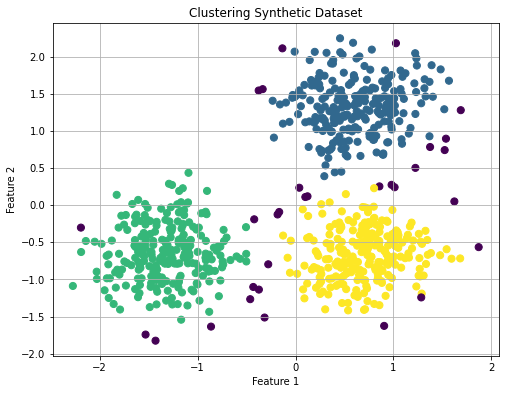

In [ ]:
import matplotlib.pyplot as plt

# Plotting the dataset
plt.figure(figsize=(8, 6))
plt.scatter(x1[:, 0], x1[:, 1], s=50,c=labelsdb2)
plt.title("Clustering Synthetic Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

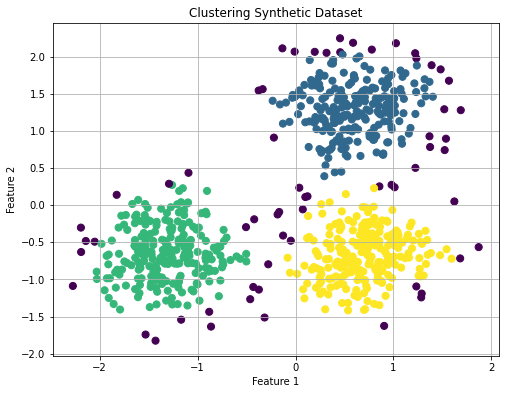

In [ ]:
import matplotlib.pyplot as plt

# Plotting the dataset
plt.figure(figsize=(8, 6))
plt.scatter(x1[:, 0], x1[:, 1], s=50,c=labelsdb1)
plt.title("Clustering Synthetic Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

The DBSCAN clustering algorithm uses 2 hyperparameters; minimum number of samples and maximum distance epsilon. Episolon represents the threshold for two points to be in the same neighborhood, while minimum number of samples is defined for a neighborhood and this creates a core point. Points that are core points or in the neighborhood are labeled as part of clusters. Hyperparameters were optimized and visualized to optimize the cluster size and identify anomalies. For the dataset, minimum number of samples was chosen to be 16 and the max distance epislon was 0.27.

In the following scatterplots, the plots show 4 classes; -1,0,1,2, where -1 represents noise according to DBscan. DBscan classifies a point as noise when its outside an episolon neighborhood, which in this is a neighborhood with 10 points and within 0.27 distance. If it is outside this neighborhood, it is not considered a core point (point within athe neighborhood that contains min sample number) or a borderpoint (point within the neighborhood, but not under minimum sample rule), thus making it noise.

Question 5: Now, choose either the K-means results from Q3 or DBSCAN, remove the pints that the chosen method deemed anomalous, and train a decision tree form the remaining data to classify the speicies. Visualize the model decision tree (but not just by plotting lines, result should be the tree itself).

In [ ]:
# Remove points deemed anomalous

anom=np.where(labelsdb1==-1)[0]

filt_x1=np.delete(x1,anom,axis=0)
filt_ldb1=np.delete(labelsdb1,anom,axis=0)

print(len(filt_x1))
print(len(filt_ldb1))

688
688


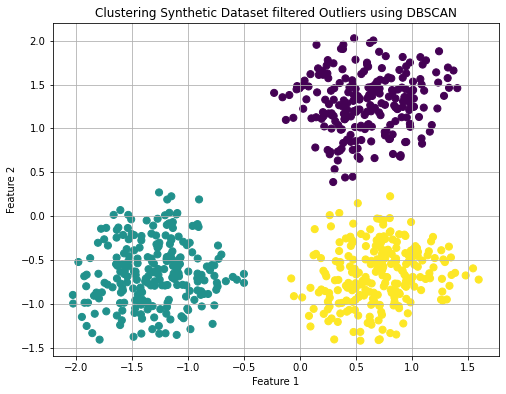

In [ ]:
# Plot Filtered dataset

# Plotting the dataset
plt.figure(figsize=(8, 6))
plt.scatter(filt_x1[:, 0], filt_x1[:, 1], s=50,c=filt_ldb1)
plt.title("Clustering Synthetic Dataset filtered Outliers using DBSCAN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X=filt_x1
y=filt_ldb1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decisiontree=DecisionTreeClassifier(random_state=55)
decisiontree.fit(X_train,y_train)
y_pred=decisiontree.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)




In [ ]:
print("Decision Tree Accuracy:", accuracy)


Decision Tree Accuracy: 1.0


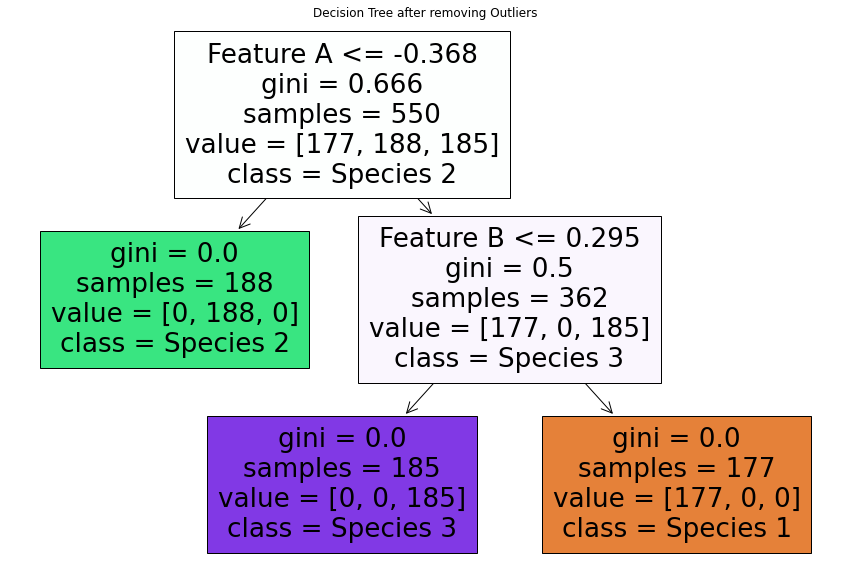

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(decisiontree, filled=True, feature_names=['Feature A','Feature B'], class_names=['Species 1','Species 2','Species 3'])
plt.title('Decision Tree after removing Outliers')
plt.show()

Question 6: Show that, in fact, it helped to clean the outliers before generating the decision tree. Looking for something more substantial than accuracy improvement

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X=x1
y=labelsdb1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decisiontree=DecisionTreeClassifier(random_state=55)
decisiontree.fit(X_train,y_train)
y_pred=decisiontree.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print("Decision Tree Accuracy:", accuracy)


Decision Tree Accuracy: 0.9733333333333334


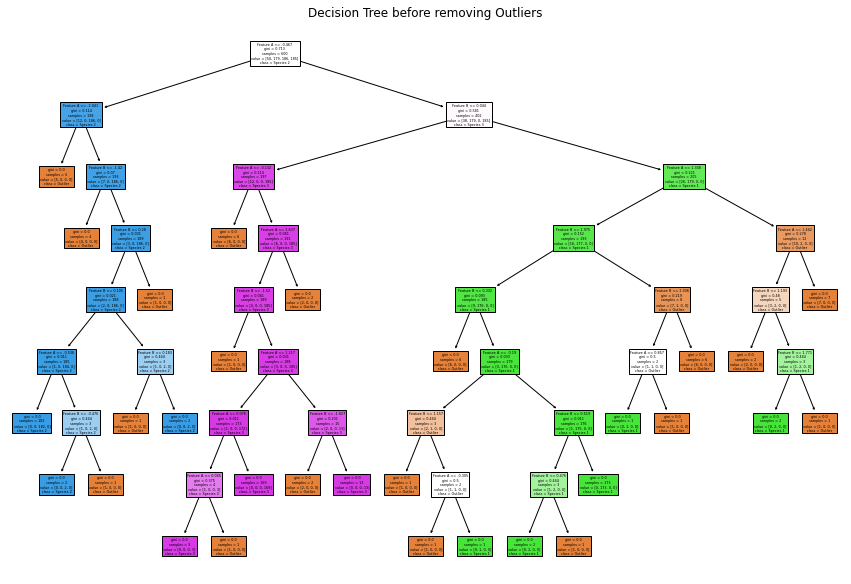

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(decisiontree, filled=True, feature_names=['Feature A','Feature B'], class_names=['Outlier','Species 1','Species 2','Species 3'])
plt.title('Decision Tree before removing Outliers')
plt.show()

From the decision tree comparisons before and after removing outliers, it is clear that removing outliers greatly reduces the complexity and size of the tree. First, DBSCAN places outliers in a seperate class (noise), which is eliminated with its removal. Next, although only two features exist, the decision tree's information gain is much easier to acquire when outliers are removed, which contributes to the reduction and size and complexity of the tree.